<a href="https://colab.research.google.com/github/snvssk/data298A/blob/saidev/SolarModel_ANN_2010-2018.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt

In [10]:
df = pd.read_csv('/content/all_cities_transformed_combined.csv')

In [27]:
nsrdb_na = df.drop(columns='Unnamed: 0')

In [28]:
nsrdb_na

,Year,Month,Day,Hour,Minute,Temperature,Cloud_Type,Dew_Point,GHI,Relative_Humidity,Solar_Zenith_Angle,Surface_Albedo,Pressure,Precipitable_Water,Wind_Direction,Wind_Speed,Location
0,2018.0,1.0,1.0,0.0,0.0,11.2,4.0,10.2,0.0,93.63,165.41,0.10,1024.0,1.7,294.0,0.7,117987.0
1,2018.0,1.0,1.0,0.0,30.0,11.2,4.0,10.2,0.0,93.63,165.11,0.10,1024.0,1.7,307.0,0.7,117987.0
2,2018.0,1.0,1.0,1.0,0.0,11.1,4.0,10.1,0.0,93.38,162.29,0.10,1024.0,1.7,321.0,0.7,117987.0
3,2018.0,1.0,1.0,1.0,30.0,11.0,0.0,10.1,0.0,94.00,157.91,0.10,1024.0,1.8,332.0,0.7,117987.0
4,2018.0,1.0,1.0,2.0,0.0,10.9,0.0,9.9,0.0,93.32,152.72,0.10,1024.0,1.8,344.0,0.7,117987.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
789271,2018.0,1.0,17.0,6.0,30.0,11.1,6.0,10.9,0.0,98.82,100.12,0.12,1025.0,2.2,147.0,1.0,117546.0
789272,2018.0,1.0,17.0,7.0,0.0,11.0,6.0,10.9,0.0,99.34,94.53,0.12,1025.0,2.2,157.0,1.0,117546.0
789273,2018.0,1.0,17.0,7.0,30.0,12.1,7.0,10.9,6.0,92.39,88.74,0.12,1025.0,2.2,164.0,1.1,117546.0
789274,2018.0,1.0,17.0,8.0,0.0,13.2,4.0,11.6,24.0,90.13,83.78,0.12,1025.0,2.2,171.0,1.2,117546.0


In [29]:
null_rows = nsrdb_na[nsrdb_na.isna().any(axis=1)]
null_rows

,Year,Month,Day,Hour,Minute,Temperature,Cloud_Type,Dew_Point,GHI,Relative_Humidity,Solar_Zenith_Angle,Surface_Albedo,Pressure,Precipitable_Water,Wind_Direction,Wind_Speed,Location
17520,NaN,117987.0,NaN,NaN,NaN,37.37,-8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,117987.0
17521,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,117987.0
35042,NaN,117987.0,NaN,NaN,NaN,37.37,-8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,117987.0
35043,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,117987.0
52564,NaN,117987.0,NaN,NaN,NaN,37.37,-8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,117987.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
770966,NaN,116662.0,NaN,NaN,NaN,37.25,-8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,116662.0
770967,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,116662.0
788488,NaN,117546.0,NaN,NaN,NaN,37.33,-8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
788489,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
nsrdb_na.isnull().sum()

Year                  90
Month                 45
Day                   90
Hour                  90
Minute                90
Temperature           45
Cloud_Type            45
Dew_Point             90
GHI                   90
Relative_Humidity     90
Solar_Zenith_Angle    90
Surface_Albedo        90
Pressure              90
Precipitable_Water    90
Wind_Direction        90
Wind_Speed            91
Location              11
dtype: int64

In [31]:
nsrdb_na.columns

Index(['Year', 'Month', 'Day', 'Hour', 'Minute', 'Temperature', 'Cloud_Type',
       'Dew_Point', 'GHI', 'Relative_Humidity', 'Solar_Zenith_Angle',
       'Surface_Albedo', 'Pressure', 'Precipitable_Water', 'Wind_Direction',
       'Wind_Speed', 'Location'],
      dtype='object')

In [32]:
nsrdb_na['GHI'].isnull().values.sum()

90

In [33]:
nsrdb = nsrdb_na.dropna()
#print(nsrdb)

          Year  Month   Day  Hour  Minute  Temperature  Cloud_Type  Dew_Point  \
0       2018.0    1.0   1.0   0.0     0.0         11.2         4.0       10.2   
1       2018.0    1.0   1.0   0.0    30.0         11.2         4.0       10.2   
2       2018.0    1.0   1.0   1.0     0.0         11.1         4.0       10.1   
3       2018.0    1.0   1.0   1.0    30.0         11.0         0.0       10.1   
4       2018.0    1.0   1.0   2.0     0.0         10.9         0.0        9.9   
...        ...    ...   ...   ...     ...          ...         ...        ...   
789270  2018.0    1.0  17.0   6.0     0.0         11.1         7.0       10.9   
789271  2018.0    1.0  17.0   6.0    30.0         11.1         6.0       10.9   
789272  2018.0    1.0  17.0   7.0     0.0         11.0         6.0       10.9   
789273  2018.0    1.0  17.0   7.0    30.0         12.1         7.0       10.9   
789274  2018.0    1.0  17.0   8.0     0.0         13.2         4.0       11.6   

         GHI  Relative_Humi

In [35]:
null_rows1 = nsrdb[nsrdb.isna().any(axis=1)]
null_rows1

,Year,Month,Day,Hour,Minute,Temperature,Cloud_Type,Dew_Point,GHI,Relative_Humidity,Solar_Zenith_Angle,Surface_Albedo,Pressure,Precipitable_Water,Wind_Direction,Wind_Speed,Location


In [36]:
nsrdb.isnull().sum()

Year                  0
Month                 0
Day                   0
Hour                  0
Minute                0
Temperature           0
Cloud_Type            0
Dew_Point             0
GHI                   0
Relative_Humidity     0
Solar_Zenith_Angle    0
Surface_Albedo        0
Pressure              0
Precipitable_Water    0
Wind_Direction        0
Wind_Speed            0
Location              0
dtype: int64

In [37]:
target = nsrdb['GHI']#keeping only target(ghi) data here
target

0          0.0
1          0.0
2          0.0
3          0.0
4          0.0
          ... 
789270     0.0
789271     0.0
789272     0.0
789273     6.0
789274    24.0
Name: GHI, Length: 789185, dtype: float64

In [38]:
input= nsrdb.drop(['GHI'], axis=1)
input

,Year,Month,Day,Hour,Minute,Temperature,Cloud_Type,Dew_Point,Relative_Humidity,Solar_Zenith_Angle,Surface_Albedo,Pressure,Precipitable_Water,Wind_Direction,Wind_Speed,Location
0,2018.0,1.0,1.0,0.0,0.0,11.2,4.0,10.2,93.63,165.41,0.10,1024.0,1.7,294.0,0.7,117987.0
1,2018.0,1.0,1.0,0.0,30.0,11.2,4.0,10.2,93.63,165.11,0.10,1024.0,1.7,307.0,0.7,117987.0
2,2018.0,1.0,1.0,1.0,0.0,11.1,4.0,10.1,93.38,162.29,0.10,1024.0,1.7,321.0,0.7,117987.0
3,2018.0,1.0,1.0,1.0,30.0,11.0,0.0,10.1,94.00,157.91,0.10,1024.0,1.8,332.0,0.7,117987.0
4,2018.0,1.0,1.0,2.0,0.0,10.9,0.0,9.9,93.32,152.72,0.10,1024.0,1.8,344.0,0.7,117987.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
789270,2018.0,1.0,17.0,6.0,0.0,11.1,7.0,10.9,98.73,105.84,0.12,1024.0,2.3,138.0,1.0,117546.0
789271,2018.0,1.0,17.0,6.0,30.0,11.1,6.0,10.9,98.82,100.12,0.12,1025.0,2.2,147.0,1.0,117546.0
789272,2018.0,1.0,17.0,7.0,0.0,11.0,6.0,10.9,99.34,94.53,0.12,1025.0,2.2,157.0,1.0,117546.0
789273,2018.0,1.0,17.0,7.0,30.0,12.1,7.0,10.9,92.39,88.74,0.12,1025.0,2.2,164.0,1.1,117546.0


In [39]:
from sklearn.preprocessing import StandardScaler
#Normalize the dataset
sc = StandardScaler()
input_normalized = sc.fit_transform(input)

In [40]:
from sklearn.model_selection import train_test_split
import numpy as np
x_train, x_test, y_train, y_test = train_test_split(input_normalized, target, test_size=0.3, random_state=42)

In [41]:
x_test

array([[ 0.3854895 ,  1.2981952 ,  0.03256633, ...,  1.12634176,
         0.76033965, -0.20185767],
       [ 1.1595483 ,  1.2981952 ,  0.03256633, ...,  0.31526445,
        -0.19494741,  0.13542396],
       [ 1.1595483 , -1.02028515, -0.64956727, ...,  0.87436875,
         0.46640517,  1.83800313],
       ...,
       [ 1.1595483 ,  0.13895503,  0.82838887, ...,  0.01941554,
         0.09898707,  0.13542396],
       [-1.54965752, -0.15085502,  0.9420778 , ..., -0.02696755,
         0.02550345, -0.88566152],
       [ 1.54657771,  1.58800525, -0.4221894 , ...,  1.35198924,
         0.09898707, -0.88489147]])

In [42]:
print("x_train shape",x_train.shape)
print("x_test shape",x_test.shape)
print("y_train shape",y_train.shape)
print("y_text shape",y_test.shape)

x_train shape (552429, 16)
x_test shape (236756, 16)
y_train shape (552429,)
y_text shape (236756,)


# https://github.com/tpt5cu/solarIrradiancePredictor/blob/master/Neural_Net.ipynb

In [44]:
from tensorflow.keras.optimizers import Adam
import pandas as pd
import os
import numpy as np
from glob import glob
from matplotlib import pyplot as plt
import seaborn as sns
from random import randint
from glob import glob

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [45]:
keras.backend.clear_session()
tf.keras.backend.clear_session()

In [46]:
keras.backend.clear_session()
tf.keras.backend.clear_session()
tf.compat.v1.reset_default_graph

<function tensorflow.python.framework.ops.reset_default_graph()>

In [47]:
model = keras.Sequential()
model.add(layers.Dense(300, activation="relu"))
model.add(layers.Dense(200, activation="relu"))
model.add(layers.Dense(100, activation="relu"))
model.add(layers.Dense(50, activation="relu"))
model.add(layers.Dense(25, activation="relu"))
model.add(layers.Dense(1, activation='relu'))

In [53]:
#Compile and train
model.compile(optimizer=Adam(lr=0.0001), 
              loss='mse',
              metrics=['mae',keras.metrics.RootMeanSquaredError()])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [54]:
history = model.fit(x_train, y_train, epochs=100, batch_size=64)

Epoch 1/100
8632/8632 [==============================] - 31s 3ms/step - loss: 7300.1338 - mae: 33.8067 - root_mean_squared_error: 85.4408
Epoch 2/100
8632/8632 [==============================] - 31s 4ms/step - loss: 1938.9172 - mae: 18.4690 - root_mean_squared_error: 44.0331
Epoch 3/100
8632/8632 [==============================] - 30s 3ms/step - loss: 1699.9796 - mae: 16.5145 - root_mean_squared_error: 41.2308
Epoch 4/100
8632/8632 [==============================] - 30s 3ms/step - loss: 1617.5005 - mae: 15.7946 - root_mean_squared_error: 40.2182
Epoch 5/100
8632/8632 [==============================] - 30s 3ms/step - loss: 1570.6005 - mae: 15.3456 - root_mean_squared_error: 39.6308
Epoch 6/100
8632/8632 [==============================] - 30s 3ms/step - loss: 1535.4794 - mae: 15.0621 - root_mean_squared_error: 39.1852
Epoch 7/100
8632/8632 [==============================] - 30s 3ms/step - loss: 1507.4153 - mae: 14.8504 - root_mean_squared_error: 38.8254
Epoch 8/100
8632/8632 [===========

In [55]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 300)               5100      
                                                                 
 dense_1 (Dense)             (None, 200)               60200     
                                                                 
 dense_2 (Dense)             (None, 100)               20100     
                                                                 
 dense_3 (Dense)             (None, 50)                5050      
                                                                 
 dense_4 (Dense)             (None, 25)                1275      
                                                                 
 dense_5 (Dense)             (None, 1)                 26        
                                                                 
Total params: 91,751
Trainable params: 91,751
Non-traina

## Training MAE 10.50 w/m2, RMSE 26.05 w/m2 after 100 epoch

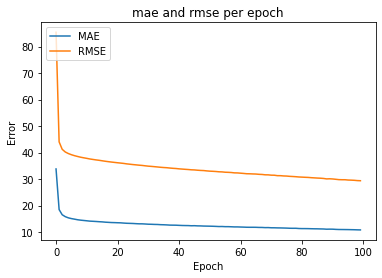

In [56]:
plt.plot(history.history['mae'])
plt.plot(history.history['root_mean_squared_error'])
plt.title('mae and rmse per epoch')
plt.ylabel('Error')
plt.xlabel('Epoch')
plt.legend(['MAE', 'RMSE'], loc='upper left')
plt.show()

In [57]:
y_pred=model.predict(x_test)

In [ ]:
"""i = randint(0,8760)
print("index is ",i)
print("Actual ",y_test[i]," ","Predicted ", y_pred[i])"""

'i = randint(0,8760)\nprint("index is ",i)\nprint("Actual ",y_test[i]," ","Predicted ", y_pred[i])'

In [58]:
from sklearn.metrics import r2_score 
 
R_square = r2_score(y_test, y_pred) 
print('Coefficient of Determination R2', R_square) 

Coefficient of Determination R2 0.9881695962337325


## R2 of 99% explains all the features we have in our dataset contributing towards to predict GHI. 

In [59]:
from sklearn import metrics
#MAE
print("Model MAE", metrics.mean_absolute_error(y_test, y_pred))

#MSE
print("Model MSE", metrics.mean_squared_error(y_test, y_pred))

#RMSE
print("Model RMSE",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Model MAE 11.683076318857491
Model MSE 1100.4535130933928
Model RMSE 33.173084166133734


## The model validated with 30% data and the validation MAE we got 11.68 w/m2, and RMSE 33.17 w/m2. Might be the validation dataset location is different than the training dataset. So, we got bit high MAE and RMSE. We will validate the model with a new location and observe the errors. However, it still performed surprisingly well. 

In [2]:
import pandas as pd
fostercitytest=pd.read_csv('/content/fostercity_transformed_combined.csv')